In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, minmax_scale
import os
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df_raw = pd.read_csv('****')
df_raw.columns = ['ts', 'customerid', 'shows', 'index']

In [3]:
def normalize_df(_df):
    return _df / _df.values.max(axis=1).reshape(-1, 1)
    # we can do the same with sum() 
    # or with  _df.values / _df.values.max(axis=1)[:, np.newaxis]

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472703 entries, 0 to 472702
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ts          472703 non-null  object 
 1   customerid  472703 non-null  float64
 2   shows       472703 non-null  int64  
 3   index       472703 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 14.4+ MB


In [5]:
df_raw.head(10)

,ts,customerid,shows,index
0,2020-08-22 00:00:00.000000,129157.613667,46,5
1,2020-08-22 00:00:00.000000,129166.425667,5,1
2,2020-08-22 00:00:00.000000,129176.084333,25,3
3,2020-08-22 00:00:00.000000,129317.112333,14,2
4,2020-08-22 00:00:00.000000,131081.250333,1,2
5,2020-08-22 00:00:00.000000,131083.129667,9,3
6,2020-08-22 00:00:00.000000,131085.005333,2,2
7,2020-08-22 00:00:00.000000,131086.893000,7,4
8,2020-08-22 00:00:00.000000,131099.380000,17,8
9,2020-08-22 00:00:00.000000,131103.003333,2,1


In [6]:
df_raw['ts'] = pd.to_datetime(df_raw['ts'])

In [7]:
df_pivot = pd.pivot_table(df_raw, index='customerid', columns='ts', values='shows', fill_value=0)

df_pivot

ts,2020-08-22 00:00:00,2020-08-22 02:00:00,2020-08-22 04:00:00,2020-08-22 06:00:00,2020-08-22 08:00:00,2020-08-22 10:00:00,2020-08-22 12:00:00,2020-08-22 14:00:00,2020-08-22 16:00:00,2020-08-22 18:00:00,...,2020-08-25 06:00:00,2020-08-25 08:00:00,2020-08-25 10:00:00,2020-08-25 12:00:00,2020-08-25 14:00:00,2020-08-25 16:00:00,2020-08-25 18:00:00,2020-08-25 20:00:00,2020-08-25 22:00:00,2020-08-26 00:00:00
customerid,,,,,,,,,,,,,,,,,,,,,
1.291576e+05,46,54,60,54,74,48,53,61,50,37,...,8,38,77,45,45,56,21,0,0,27
1.291664e+05,5,0,14,0,0,6,259,201,31,1,...,0,77,136,118,339,107,30,3,0,0
1.291745e+05,0,0,0,0,0,0,0,0,0,0,...,0,0,3,35,7,0,0,0,0,0
1.291761e+05,25,0,22,3,2,3,7,5,1,2,...,0,0,36,4,33,0,10,1,0,0
1.291812e+05,0,0,0,0,3,5,6,0,0,0,...,4,0,16,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.209292e+06,0,0,0,0,3,9,0,0,0,10,...,0,0,8,8,3,0,0,10,28,0
1.209294e+06,0,0,0,0,6,0,0,2,5,0,...,3,0,6,6,8,15,18,136,135,42
1.209334e+06,0,0,0,0,1,0,0,0,1,0,...,57,85,49,0,0,27,27,1,54,0


In [8]:
df_avg = df_pivot.T.groupby(df_pivot.T.index.hour).mean().T

In [9]:
df_avg.head(5)

ts,0,2,4,6,8,10,12,14,16,18,20,22
customerid,,,,,,,,,,,,
129157.613667,15.8,15.25,17.00,36.50,40.50,32.50,27.75,29.75,32.50,16.00,12.00,7.0
129166.425667,1.0,0.00,3.50,0.00,29.00,57.25,128.25,223.25,48.50,32.75,2.25,0.0
129174.469667,0.0,0.00,0.00,0.00,0.00,1.75,9.00,2.50,0.75,1.25,0.00,0.0
129176.084333,5.0,0.00,5.75,0.75,7.00,11.00,3.25,9.50,0.50,3.00,4.00,4.5
129181.221667,0.2,0.25,0.25,1.00,0.75,7.25,4.25,4.00,0.75,0.00,0.25,0.5


In [10]:
df_avg = normalize_df(df_avg)

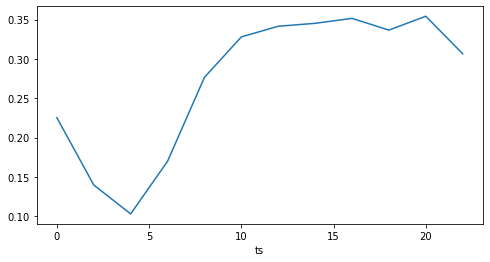

In [11]:
plt.rcParams['figure.figsize'] = [8, 4]
xg = df_avg.mean().plot()

``` python
## optional - can be used to examine silhouette_score

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics import silhouette_samples, silhouette_score

df_sample = df_avg.sample(frac=0.25)
scores = {}
max_categories = 8
for k in range(2, max_categories):
    print(f'Evaluating K={k} categories (of total={max_categories})')
    ld = LDA(n_components=k, learning_method='batch')
    ld = ld.fit(df_sample)
    trans = ld.transform(df_sample.values)
    labels = np.argmax(trans, axis=1)
    # log_like = ld.score(df_x.iloc[:,1:])
    scores[k] = silhouette_score(df_sample.values, labels)

zip_scores = sorted(scores.items())
x, y = zip(*zip_scores)
plt.plot(x, y)
plt.xticks(ticks=[*scores.keys()])
plt.grid(axis='both')
plt.show()

```

In [12]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=3, learning_method='batch')

lda = lda.fit(df_avg)

df_comp = pd.DataFrame(lda.components_.T, index=df_avg.columns)

In [13]:
df_comp

,0,1,2
ts,,,
0,4807.931508,766.587885,59.639116
2,3402.115002,92.581985,2.873292
4,2515.665720,8.268414,54.667711
6,906.225760,17.011805,3326.078429
8,299.434742,159.352670,6455.502701
10,434.137774,1717.988314,6046.299620
12,515.413994,4766.288147,3255.499666
14,544.055311,5781.146520,2304.415022
16,707.138692,6182.464425,1897.998444


In [14]:
norm_components = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
df_comp_norm = pd.DataFrame(norm_components.T, index=df_avg.columns)
df_comp_norm 

,0,1,2
ts,,,
0,0.213352,0.024133,0.002156
2,0.150969,0.002915,0.000104
4,0.111633,0.000260,0.001976
6,0.040214,0.000536,0.120246
8,0.013287,0.005017,0.233383
10,0.019265,0.054085,0.218590
12,0.022871,0.150051,0.117695
14,0.024142,0.182000,0.083311
16,0.031379,0.194634,0.068618


In [15]:
# assign each vector the cluster withwhich it is most associated
df_avg['cluster'] = np.argmax(lda.transform(df_avg), axis=1)

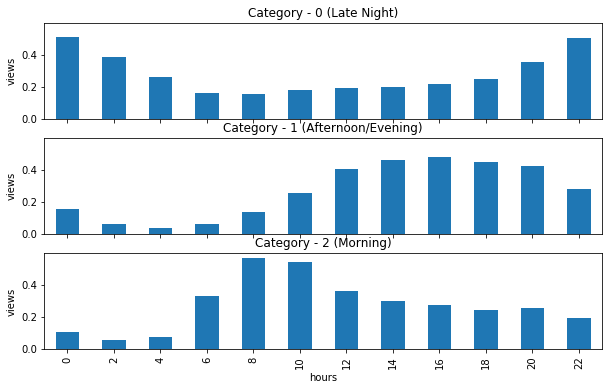

In [18]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

df_avg.iloc[:,:-1].loc[df_avg.cluster == 0].mean().plot.bar(ax=axs[0])
axs[0].set_title('Category - 0 (Late Night)')

df_avg.iloc[:,:-1].loc[df_avg.cluster == 1].mean().plot.bar(ax=axs[1])
axs[1].set_title('Category - 1 (Afternoon/Evening)')

df_avg.iloc[:,:-1].loc[df_avg.cluster == 2].mean().plot.bar(ax=axs[2])
axs[2].set_title('Category - 2 (Morning)')

for ax in axs.flat:
    ax.set(xlabel='hours', ylabel='views')

In [22]:
lda.transform(df_avg.iloc[:25,:-1])

array([[0.26982272, 0.06218908, 0.66798819],
       [0.10716855, 0.67972021, 0.21311125],
       [0.12738693, 0.70662478, 0.16598829],
       [0.35094678, 0.0809841 , 0.56806911],
       [0.12186438, 0.1237528 , 0.75438282],
       [0.05238782, 0.08335637, 0.86425581],
       [0.10231366, 0.15301446, 0.74467187],
       [0.18084099, 0.63355799, 0.18560102],
       [0.08046414, 0.83283105, 0.08670481],
       [0.09280321, 0.65041552, 0.25678128],
       [0.07483426, 0.4790397 , 0.44612604],
       [0.18829019, 0.61127267, 0.20043713],
       [0.13456494, 0.13448285, 0.73095221],
       [0.22039058, 0.69582431, 0.08378511],
       [0.5902318 , 0.3060958 , 0.1036724 ],
       [0.41279036, 0.124197  , 0.46301264],
       [0.49436242, 0.28954738, 0.2160902 ],
       [0.26084335, 0.09604731, 0.64310934],
       [0.62603113, 0.23513941, 0.13882947],
       [0.78754355, 0.10901153, 0.10344492],
       [0.10110392, 0.3548477 , 0.54404838],
       [0.27097294, 0.11749952, 0.61152754],
       [0.

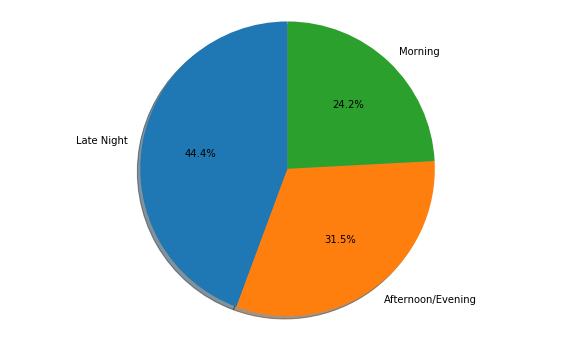

In [23]:
summs = df_avg.cluster.value_counts()
cats = np.zeros(len(summs))
for i, x in enumerate(summs): cats[i] = x
    

labels = ['Late Night','Afternoon/Evening', 'Morning']
sizes = summs.astype(int)


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

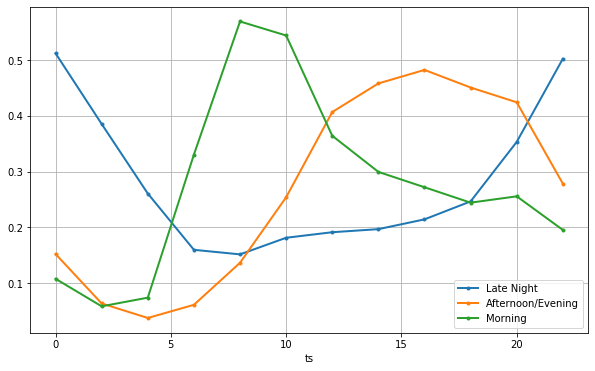

In [24]:
plt.rcParams['figure.figsize'] = [10, 6]

cat_count = lda.components_.shape[0]
for category in range(0, cat_count):
    df_avg.iloc[:,:-1].loc[df_avg.cluster == category].mean().plot(label=labels[category], linewidth=2, marker='.')

plt.grid(axis='both')
plt.legend()
plt.show()

In [25]:
customerid = 120

formatter = "{:.2%}".format
sample = df_avg.iloc[customerid,:-1]
perc = lda.transform(np.array(sample).reshape(1, -1))

data = np.array([formatter(x) for x in perc[0]])
pd.DataFrame(data, index=labels, columns=['%'])

,%
Late Night,52.87%
Afternoon/Evening,9.72%
Morning,37.41%


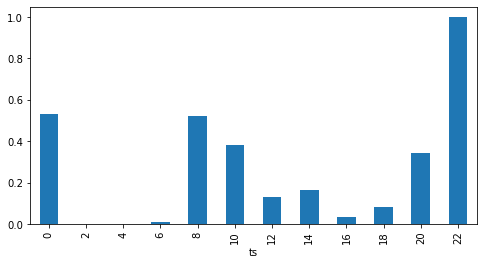

In [26]:
plt.rcParams['figure.figsize'] = [8, 4]
g = df_avg.iloc[customerid,:-1].plot.bar()

### Late night watchers

Prime watch time: [0, 2, 20, 22]


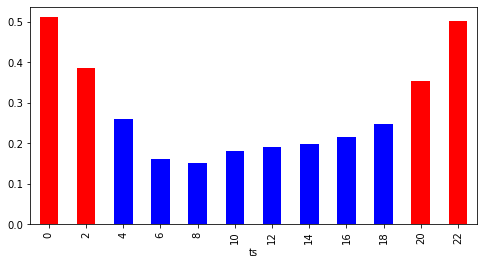

In [27]:
cluster = 0

mean_views_df = df_avg.loc[df_avg.cluster == cluster].mean()[:-1]
mean_views_total = mean_views_df.mean()

mask = mean_views_df > mean_views_total

colors = np.array(['b'] * len(mean_views_df))
colors[mask.values] = 'r'

gx = mean_views_df.plot.bar(color=colors)

top_hours = [hour for hour in mean_views_df.index if mask[hour] == True]
print(f'Prime watch time: {top_hours}')

### KMEANS comparison

Evaluating K=2 categories (of total=8)
Evaluating K=3 categories (of total=8)
Evaluating K=4 categories (of total=8)
Evaluating K=5 categories (of total=8)
Evaluating K=6 categories (of total=8)
Evaluating K=7 categories (of total=8)


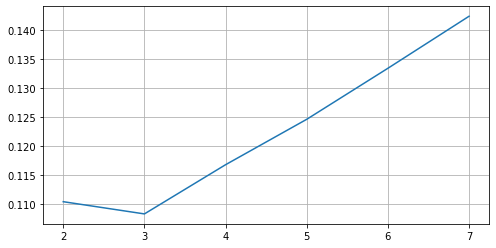

In [28]:
if 'cluster' in df_avg.columns:
    df_avg = df_avg.drop('cluster', axis=1).copy()
    
# lets try KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
df_sample = df_avg.sample(frac=0.5)

scores = {}
max_categories = 8
for k in range(2, max_categories):
    print(f'Evaluating K={k} categories (of total={max_categories})')
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df_sample)
    scores[k] = silhouette_score(df_sample, labels)

zip_scores = sorted(scores.items())
x, y = zip(*zip_scores)
plt.plot(x, y)
plt.xticks(ticks=[*scores.keys()])
plt.grid(axis='both')
plt.show()

[[    0  6209]
 [    1  8367]
 [    2 10424]]


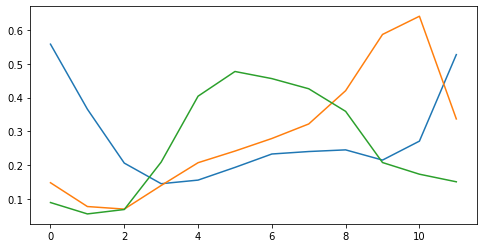

In [30]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(df_avg)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)
df_avg['cluster'] = kmeans.labels_

plt.plot(kmeans.cluster_centers_[0])
plt.plot(kmeans.cluster_centers_[1])
plt.plot(kmeans.cluster_centers_[2])
plt.show()

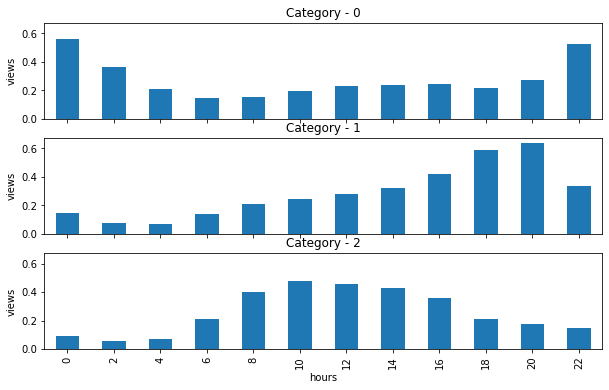

In [31]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

df_avg.iloc[:,:-1].loc[df_avg.cluster == 0].mean().plot.bar(ax=axs[0])
axs[0].set_title('Category - 0')

df_avg.iloc[:,:-1].loc[df_avg.cluster == 1].mean().plot.bar(ax=axs[1])
axs[1].set_title('Category - 1')

df_avg.iloc[:,:-1].loc[df_avg.cluster == 2].mean().plot.bar(ax=axs[2])
axs[2].set_title('Category - 2')

for ax in axs.flat:
    ax.set(xlabel='hours', ylabel='views')